In [11]:
import sys
sys.path.insert(0, '/home/shenwanxiang/Research/bidd-clsar/')


from math import sqrt
import pandas as pd

import torch
import torch.nn.functional as F
from rdkit import Chem

from torch_geometric.loader import DataLoader
from torch_geometric.datasets import MoleculeNet
from torch_geometric.nn.models import AttentiveFP




In [12]:
from clsar.dataset import LSSNS
from clsar.feature import Gen115AtomFeatures, GenAttentiveFeatures

In [13]:
! rm -r ../../tmp/data*

rm: cannot remove '../../tmp/data*': No such file or directory


In [14]:
for dataset_name in LSSNS.names.keys():
    print(dataset_name)

for dataset_name in MoleculeNet.names.keys():
    print(dataset_name)

ur2
plk1
rip2
rorg
klk5
braf
usp7
phgdh
notum
rxfp1
mglur2
pkci
eaat3
esol
freesolv
lipo
pcba
muv
hiv
bace
bbbp
tox21
toxcast
sider
clintox


In [15]:
dataset_name = 'phgdh'
Dataset =  LSSNS # MoleculeNet
epochs = 500

In [16]:
pre_transform = Gen115AtomFeatures()
in_channels = 115
path = '/tmp/data1'

# use the attentiveFP node and edge features during the mol-2-graph transoformation
#dataset = LSSInhibitor(path, name=dataset_name, pre_transform=GenAttentiveFeatures()).shuffle()
dataset = Dataset(path, name=dataset_name, pre_transform=pre_transform).shuffle()

batch_size = 16

# train, valid, test splitting
N = len(dataset) // 5
val_dataset = dataset[:N]
test_dataset = dataset[N:2 * N]
train_dataset = dataset[2 * N:]


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AttentiveFP(in_channels=in_channels, hidden_channels=200, out_channels=1,
                    edge_dim=10, num_layers=2, num_timesteps=2,
                    dropout=0.2).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=10**-3.5,
                             weight_decay=10**-5)

def train():
    total_loss = total_examples = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x.float(), data.edge_index, data.edge_attr, data.batch)
        loss = F.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
        total_examples += data.num_graphs
    return sqrt(total_loss / total_examples)


@torch.no_grad()
def test(loader):
    mse = []
    for data in loader:
        data = data.to(device)
        out = model(data.x.float(), data.edge_index, data.edge_attr, data.batch)
        mse.append(F.mse_loss(out, data.y, reduction='none').cpu())
    return float(torch.cat(mse, dim=0).mean().sqrt())

history1 = []
for epoch in range(1, epochs):
    train_rmse = train()
    val_rmse = test(val_loader)
    test_rmse = test(test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {train_rmse:.4f} Val: {val_rmse:.4f} '
          f'Test: {test_rmse:.4f}')
    
    history1.append({'Epoch':epoch, 'train_rmse':train_rmse, 'val_rmse':val_rmse, 'test_rmse':test_rmse})
    
pd.DataFrame(history1).to_csv('./%s_%s.csv' % (dataset_name, in_channels))

Processing...
Done!


Epoch: 001, Loss: 5.3600 Val: 5.3256 Test: 5.5002
Epoch: 002, Loss: 4.4337 Val: 4.2305 Test: 4.3179
Epoch: 003, Loss: 3.1173 Val: 2.3454 Test: 2.4046
Epoch: 004, Loss: 1.5950 Val: 1.3553 Test: 1.7336
Epoch: 005, Loss: 2.0092 Val: 1.9456 Test: 1.6103
Epoch: 006, Loss: 2.4734 Val: 1.3106 Test: 1.2928
Epoch: 007, Loss: 1.5286 Val: 0.9156 Test: 1.0044
Epoch: 008, Loss: 1.0697 Val: 1.9947 Test: 1.6589
Epoch: 009, Loss: 1.4303 Val: 2.0909 Test: 2.1720
Epoch: 010, Loss: 1.5441 Val: 2.3846 Test: 2.4536
Epoch: 011, Loss: 1.4329 Val: 2.0407 Test: 2.0154
Epoch: 012, Loss: 1.4258 Val: 1.7640 Test: 1.9238
Epoch: 013, Loss: 1.3257 Val: 1.3720 Test: 1.3442
Epoch: 014, Loss: 1.0691 Val: 1.1683 Test: 1.3856
Epoch: 015, Loss: 1.3481 Val: 1.3560 Test: 1.0528
Epoch: 016, Loss: 1.1146 Val: 1.3025 Test: 1.0571
Epoch: 017, Loss: 1.3051 Val: 1.0881 Test: 1.2372
Epoch: 018, Loss: 1.1491 Val: 1.3192 Test: 1.4957
Epoch: 019, Loss: 1.1379 Val: 1.8063 Test: 1.4666
Epoch: 020, Loss: 1.0897 Val: 1.8490 Test: 1.6818


In [17]:
pre_transform = GenAttentiveFeatures()
in_channels = 39
path = '/tmp/data0'

# use the attentiveFP node and edge features during the mol-2-graph transoformation
#dataset = LSSInhibitor(path, name=dataset_name, pre_transform=GenAttentiveFeatures()).shuffle()
dataset = Dataset(path, name=dataset_name, pre_transform=pre_transform).shuffle()

batch_size = 16

# train, valid, test splitting
N = len(dataset) // 5
val_dataset = dataset[:N]
test_dataset = dataset[N:2 * N]
train_dataset = dataset[2 * N:]


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AttentiveFP(in_channels=in_channels, hidden_channels=200, out_channels=1,
                    edge_dim=10, num_layers=2, num_timesteps=2,
                    dropout=0.2).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=10**-3.5,
                             weight_decay=10**-5)

def train():
    total_loss = total_examples = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x.float(), data.edge_index, data.edge_attr, data.batch)
        loss = F.mse_loss(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs
        total_examples += data.num_graphs
    return sqrt(total_loss / total_examples)


@torch.no_grad()
def test(loader):
    mse = []
    for data in loader:
        data = data.to(device)
        out = model(data.x.float(), data.edge_index, data.edge_attr, data.batch)
        mse.append(F.mse_loss(out, data.y, reduction='none').cpu())
    return float(torch.cat(mse, dim=0).mean().sqrt())

history2 = []
for epoch in range(1, epochs):
    train_rmse = train()
    val_rmse = test(val_loader)
    test_rmse = test(test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {train_rmse:.4f} Val: {val_rmse:.4f} '
          f'Test: {test_rmse:.4f}')
    
    history2.append({'Epoch':epoch, 'train_rmse':train_rmse, 'val_rmse':val_rmse, 'test_rmse':test_rmse})
    
pd.DataFrame(history2).to_csv('./%s_%s.csv' % (dataset_name, in_channels))

Epoch: 001, Loss: 6.5937 Val: 5.7493 Test: 5.3204
Epoch: 002, Loss: 5.6081 Val: 4.7916 Test: 4.4981
Epoch: 003, Loss: 4.6575 Val: 3.7387 Test: 3.5114


Processing...
Done!


Epoch: 004, Loss: 3.5739 Val: 2.5080 Test: 2.1380
Epoch: 005, Loss: 2.3011 Val: 1.4453 Test: 1.1464
Epoch: 006, Loss: 1.2911 Val: 2.1631 Test: 1.7997
Epoch: 007, Loss: 1.9112 Val: 2.9164 Test: 2.5931
Epoch: 008, Loss: 2.4213 Val: 2.2246 Test: 2.3169
Epoch: 009, Loss: 1.8318 Val: 1.5615 Test: 1.4927
Epoch: 010, Loss: 1.2604 Val: 1.2684 Test: 1.0452
Epoch: 011, Loss: 1.2833 Val: 1.4115 Test: 0.9658
Epoch: 012, Loss: 1.5068 Val: 1.4593 Test: 0.9495
Epoch: 013, Loss: 1.5015 Val: 1.2166 Test: 1.4197
Epoch: 014, Loss: 1.5209 Val: 1.6755 Test: 1.0954
Epoch: 015, Loss: 1.4192 Val: 1.1370 Test: 1.1985
Epoch: 016, Loss: 1.3050 Val: 1.1348 Test: 0.6663
Epoch: 017, Loss: 1.0663 Val: 1.5636 Test: 1.5417
Epoch: 018, Loss: 1.1791 Val: 1.6645 Test: 1.1785
Epoch: 019, Loss: 1.3403 Val: 1.5162 Test: 1.4742
Epoch: 020, Loss: 1.2380 Val: 1.5560 Test: 1.2605
Epoch: 021, Loss: 1.0899 Val: 1.3252 Test: 0.8976
Epoch: 022, Loss: 1.1643 Val: 1.4382 Test: 0.9352
Epoch: 023, Loss: 1.1345 Val: 1.2741 Test: 0.9665


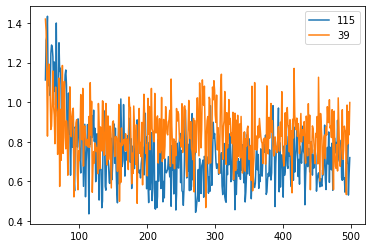

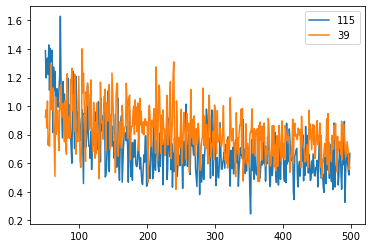

In [18]:
df1 = pd.DataFrame(history1)
df2 = pd.DataFrame(history2)

ax = df1.val_rmse.to_frame('115').join(df2.val_rmse.to_frame('39')).iloc[50:].plot()
ax = df1.test_rmse.to_frame('115').join(df2.test_rmse.to_frame('39')).iloc[50:].plot()

In [19]:
model = AttentiveFP(in_channels=in_channels, hidden_channels=200, out_channels=1,
                    edge_dim=10, num_layers=2, num_timesteps=2,
                    dropout=0.2)
out = model(data.x.float(), data.edge_index, data.edge_attr, data.batch)
from torchviz import make_dot
make_dot(out, params=dict(list(model.named_parameters()))).render("./rnn_torchviz", format="png")

NameError: name 'data' is not defined